In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Advertising Budget and Sales.csv')
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df = data[['TV Ad Budget ($)', 'Sales ($)']]
df.head()

,TV Ad Budget ($),Sales ($)
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [9]:
df = df.rename(columns={'TV Ad Budget ($)': 'ad_spend', 'Sales ($)': 'sales'})

In [10]:
df['ad_spend'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: ad_spend, Length: 200, dtype: bool

In [11]:
df['sales'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: sales, Length: 200, dtype: bool

In [49]:
x= df[['ad_spend']]
y= df[['sales']]

In [50]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
len(y_train)

150

In [55]:
model = LinearRegression()

In [56]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
coefficient = model.coef_.item()
coefficient

0.046894455732824275

In [61]:
intercept = model.intercept_.item()
intercept

7.131784506685331

In [63]:
prediction = model.predict(x_test)

In [74]:
nytest =y_test.reset_index(drop=True)
nytest

,sales
0,16.9
1,22.4
2,21.4
3,7.3
4,24.7
5,12.6
6,22.3
7,8.4
8,11.5
9,14.9


In [83]:
compare = pd.DataFrame({'Actual':nytest.values.flatten(), 'Predicted':prediction.flatten()})
compare

,Actual,Predicted
0,16.9,14.789649
1,22.4,16.294961
2,21.4,20.867171
3,7.3,7.680450
4,24.7,17.462633
5,12.6,10.653558
6,22.3,17.298503
7,8.4,9.476507
8,11.5,17.561111
9,14.9,15.343004


In [85]:
accuracy = r2_score(nytest, prediction)
accuracy

0.6606120390330492

In [86]:
error = mean_squared_error(nytest, prediction)
error

9.179298570399794

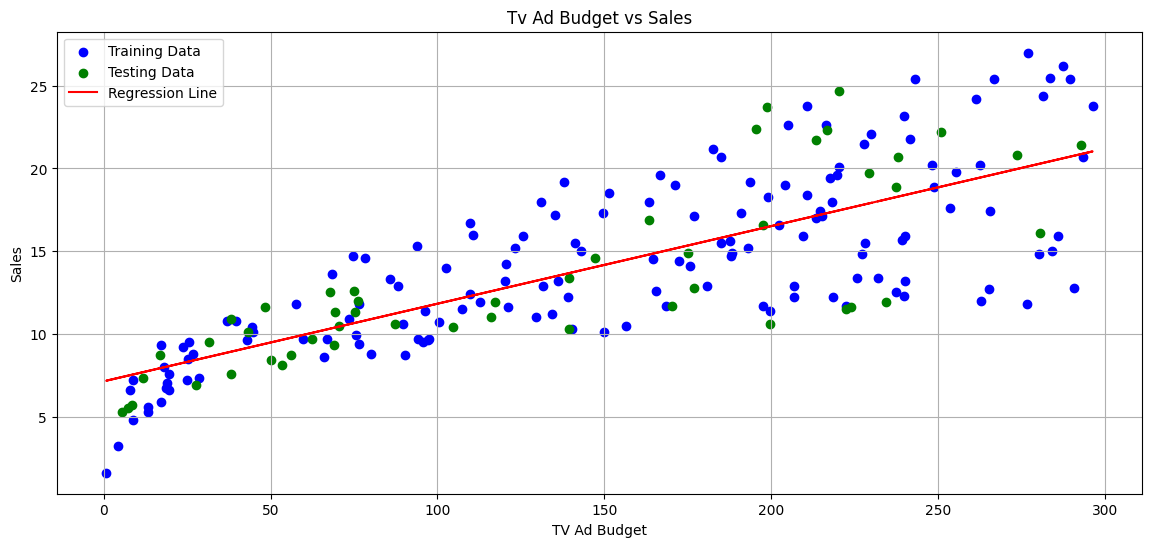

In [88]:
plt.figure(figsize=(14,6))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='green', label='Testing Data')
plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.title('Tv Ad Budget vs Sales')
plt.xlabel('TV Ad Budget')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()